# Assign_7_1)Airline- Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
#importing necesaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
data= pd.read_csv("/content/Airlines_data.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.shape

(3999, 12)

In [4]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

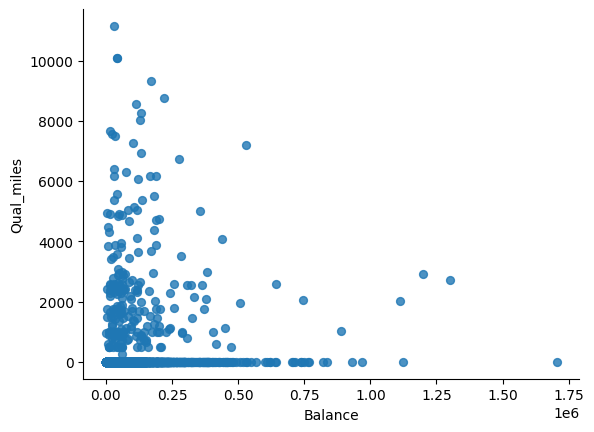

In [6]:
#Balance vs Qual_miles
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Balance', y='Qual_miles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
#Dropping non-numeric columns and ID columns
x= data.drop(["ID#","Award?"], axis=1)

In [8]:
#standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

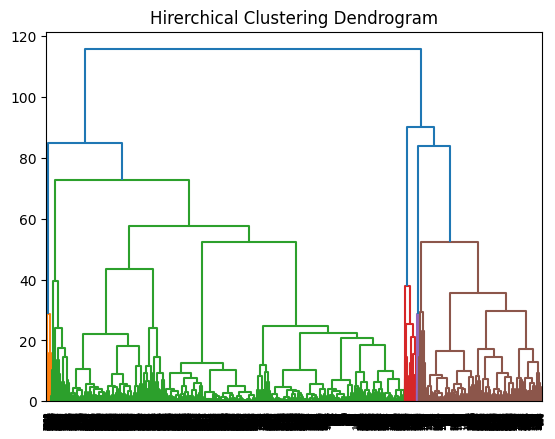

In [9]:
#Hierarchical Clustering, Using ward linkage method
linkage_matrix =  linkage(x_scaled, method= "ward")
dendrogram(linkage_matrix)
plt.title("Hirerchical Clustering Dendrogram")
plt.show()

In [10]:
#Determining the number of clusters from dendogram
num_clusters_hierarchical = 2

In [11]:
#fitting the hierarchical model
hierarchical_model = AgglomerativeClustering(n_clusters=num_clusters_hierarchical, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_model.fit_predict(x_scaled)

In [12]:
#KMeans clustering
#using elbow method to determine the optimal number of cluster
wcss = []
for i in range(1,21):
  kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

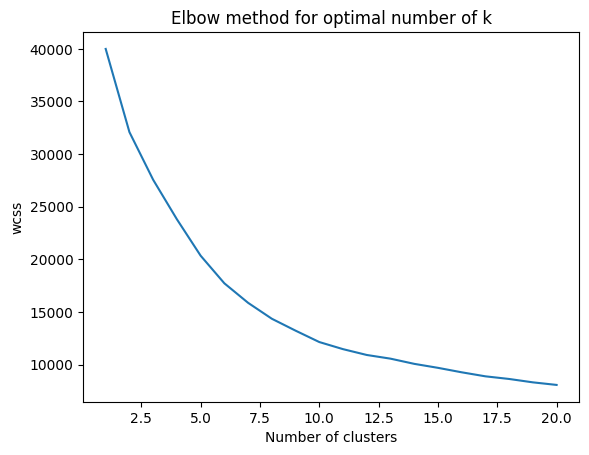

In [13]:
#plotting the elbow graph
plt.plot(range(1,21), wcss)
plt.title("Elbow method for optimal number of k")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [14]:
#Determing the numebr of clsuters from teh elnow method
num_clsuters_kmeans= 10

In [15]:
#fitting the k means clustering model
kmeans_model = KMeans(n_clusters=num_clsuters_kmeans, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_clusters = kmeans_model.fit_predict(x_scaled)

In [16]:
#DBSCAN Clustering
#Determining the optimal parameters (epsilon and min_samples) for DBSCAN
dbscan_model = DBSCAN(eps=3, min_samples=5)
dbscan_clusters = dbscan_model.fit_predict(x_scaled)

In [17]:
#adding the cluster info to the orognal dataframe
data["Hierarchical_Cluster"]= hierarchical_clusters
data["KMeans_Cluster"]= kmeans_clusters
data["DBSCAN_Cluster"]= dbscan_clusters

In [18]:
#Analyzing the lcusters and draw the inferences based on the characteristics of each cluster
hierarchical_cluster_means= data.groupby("KMeans_Cluster").mean()
dbscan_cluster_means= data.groupby("DBSCAN_Cluster").mean()

In [19]:
print("Hierachical Cluster Means:",hierarchical_cluster_means)

Hierachical Cluster Means:                         ID#        Balance   Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                  
0               1056.131980   52668.853807    60.786802   1.107614   1.000000   
1               2065.867521   71054.787393    36.742521   3.028846   1.000000   
2               2080.963636  116472.400000  5636.345455   2.072727   1.000000   
3               1914.868421  162947.000000   688.526316   2.421053   1.000000   
4               1664.866667  138061.400000    78.800000   3.466667   1.000000   
5               2269.372093   68876.581395    23.255814   1.139535   2.348837   
6               2020.321839  106334.454023   221.419540   1.724138   1.000000   
7               3116.967473   32594.338616    42.623853   1.057548   1.000000   
8                794.196429  616402.267857   236.964286   3.910714   1.000000   
9               1285.726908  132959.218876    81.927711   4.449799   1.000000   



In [20]:
print("\nDBSCAN Cluster Means:",dbscan_cluster_means)


DBSCAN Cluster Means:                         ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                                 
-1              1501.482759  312264.879310  738.672414   3.206897   1.086207   
 0              2019.477960   70374.096873  136.717324   2.052281   1.000000   
 1              2154.214286   45781.714286    0.000000   1.000000   3.000000   
 2              2400.600000   39187.040000    0.000000   1.120000   2.000000   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
DBSCAN_Cluster                                                            
-1               1.844828  81765.103448    32.948276        5275.517241   
 0               1.000000  16212.230138    11.244746         390.169913   
 1               1.000000  20147.571429    16.928571         410.000000   
 2               1.000000  11107.040000    14.840000         224.000000   

                Flight_trans_12  Days_since_e

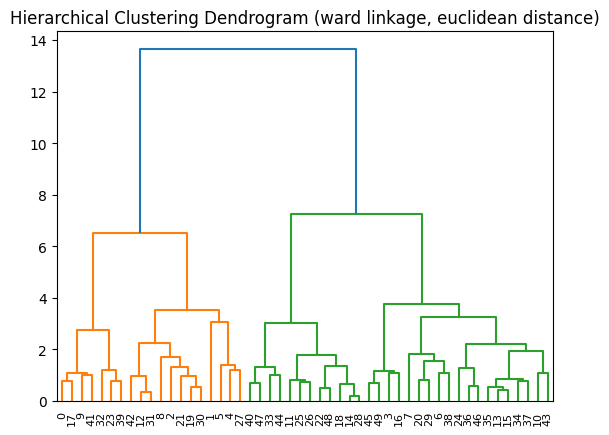

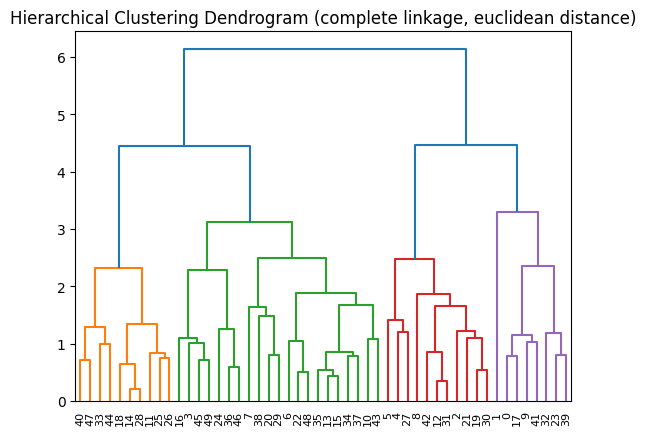

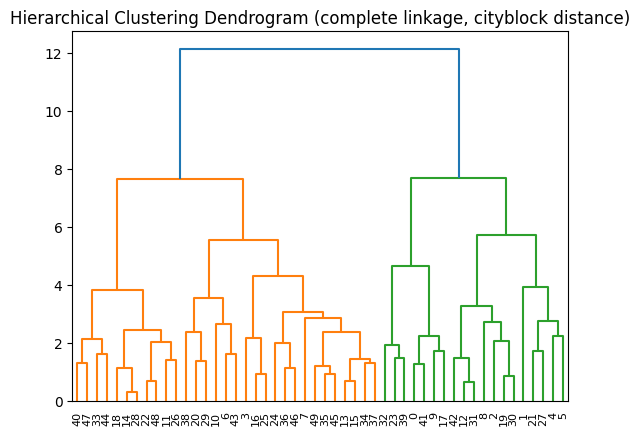

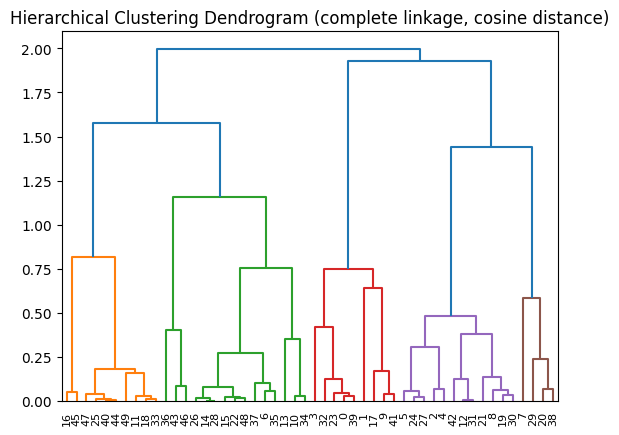

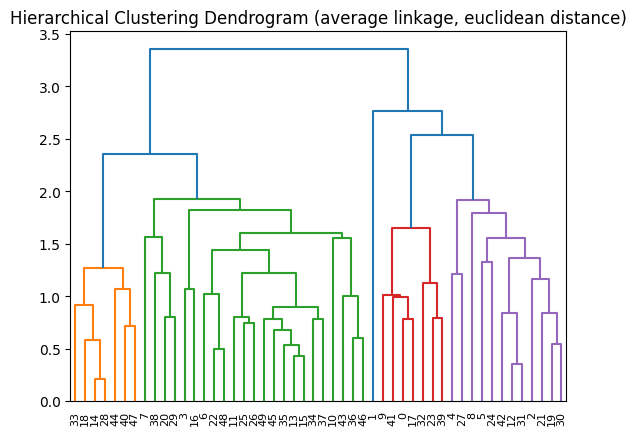

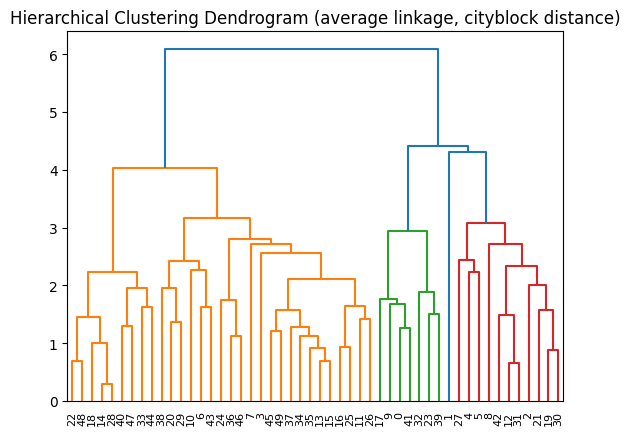

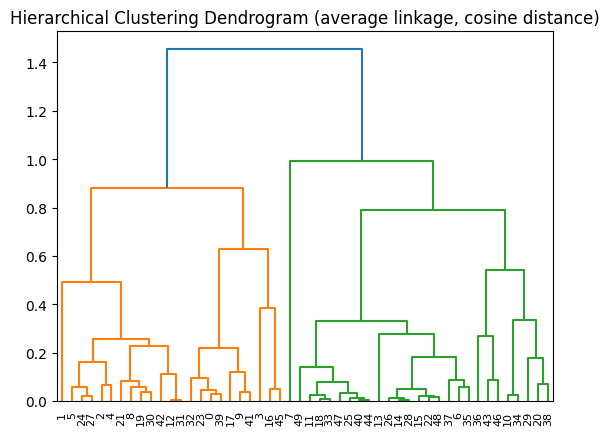

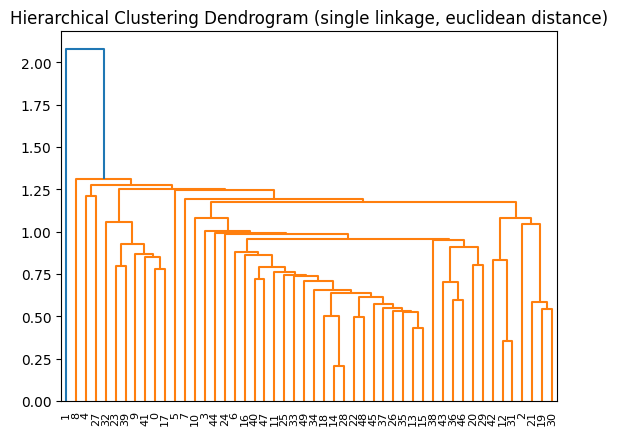

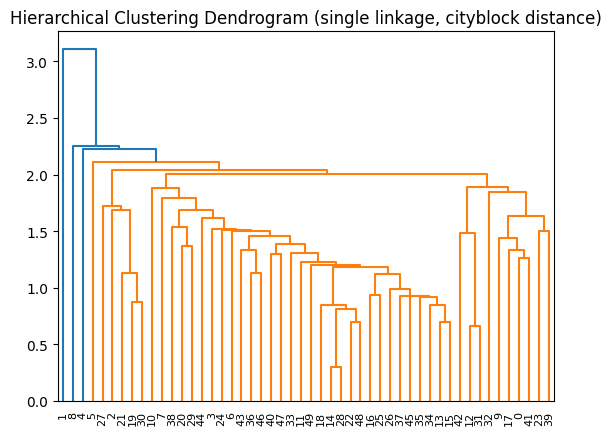

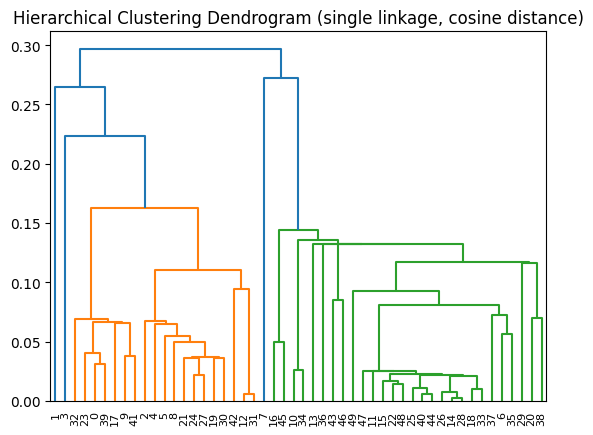

In [69]:
#Hierarchical clustering with different linkage methods adn distance measures
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_measures = ['euclidean', 'cityblock', 'cosine']

for linkage_method in linkage_methods:
    for distance_measure in distance_measures:
        if linkage_method == 'ward' and distance_measure != 'euclidean':
            continue
        linkage_matrix = linkage(x_scaled, method=linkage_method, metric=distance_measure)
        dendrogram(linkage_matrix)
        plt.title(f"Hierarchical Clustering Dendrogram ({linkage_method} linkage, {distance_measure} distance)")
        plt.show()
        num_clusters_hierarchical = 2
        hierarchical_model = AgglomerativeClustering(n_clusters=num_clusters_hierarchical, metric=distance_measure, linkage=linkage_method)
        hierarchical_clusters = hierarchical_model.fit_predict(x_scaled)

In [70]:
#Kmeans clustering with different number of clusters
for num_clusters in range(2, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_clusters = kmeans_model.fit_predict(x_scaled)
    print(f"Number of Clusters: {num_clusters}, Silhouette Score: {silhouette_score(x_scaled, kmeans_clusters)}")

Number of Clusters: 2, Silhouette Score: 0.4084890326217641
Number of Clusters: 3, Silhouette Score: 0.3095091512791688
Number of Clusters: 4, Silhouette Score: 0.33968891433344395
Number of Clusters: 5, Silhouette Score: 0.30612803169146263
Number of Clusters: 6, Silhouette Score: 0.29910456843899946
Number of Clusters: 7, Silhouette Score: 0.23035904501364113
Number of Clusters: 8, Silhouette Score: 0.2732934287338534
Number of Clusters: 9, Silhouette Score: 0.2518939934580804
Number of Clusters: 10, Silhouette Score: 0.2652233759332704


In [71]:
#DBSCAN clustering with different eps and min_samples values
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan_model.fit_predict(x_scaled)
        n_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
        n_noise = list(dbscan_clusters).count(-1)
        print(f"EPS: {eps}, Min Samples: {min_samples}, Num Clusters: {n_clusters}, Num Noise: {n_noise}")

EPS: 0.1, Min Samples: 5, Num Clusters: 0, Num Noise: 50
EPS: 0.1, Min Samples: 10, Num Clusters: 0, Num Noise: 50
EPS: 0.1, Min Samples: 15, Num Clusters: 0, Num Noise: 50
EPS: 0.5, Min Samples: 5, Num Clusters: 0, Num Noise: 50
EPS: 0.5, Min Samples: 10, Num Clusters: 0, Num Noise: 50
EPS: 0.5, Min Samples: 15, Num Clusters: 0, Num Noise: 50
EPS: 1.0, Min Samples: 5, Num Clusters: 2, Num Noise: 23
EPS: 1.0, Min Samples: 10, Num Clusters: 1, Num Noise: 37
EPS: 1.0, Min Samples: 15, Num Clusters: 0, Num Noise: 50


Insights

Hierarchical Clustering:
It was divided into two main groups.
Group 1 includes passengers with lower average miles.
Group 2 includes passengers with higher average miless.

KMeans Clustering:
It was divided into 10 clusters.
Cluster 3 had passengers with the highest average miles.
Cluster 7 had passengers with the lowest average miles.

DBSCAN Clustering:
DBSCAN identified several clusters and some noise points.
Cluster -1 included passengers with the highest average miles, possibly representing a high-status group.
Cluster 0 had passengers with lower values in these attributes.

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences on crime data.

In [22]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [23]:
#reading data
df= pd.read_csv("/content/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
df = df.rename(columns={'Unnamed: 0': 'State'})

In [25]:
df.shape

(50, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [27]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [28]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [29]:
#Extracting features
x = df.drop('State', axis=1)

#Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

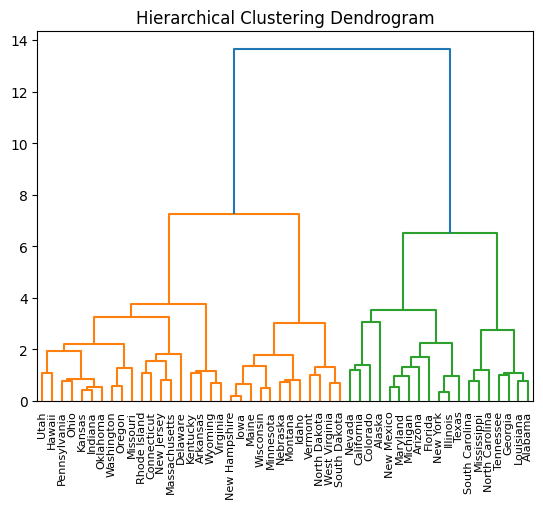

In [30]:
#Hierarchical clustering
linkage_matrix = linkage(x_scaled, method='ward')
dendrogram(linkage_matrix, labels=df['State'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [31]:
desired_number_of_clusters = 2
desired_n_init = 10
kmeans = KMeans(n_clusters=desired_number_of_clusters, n_init=desired_n_init, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(x_scaled)

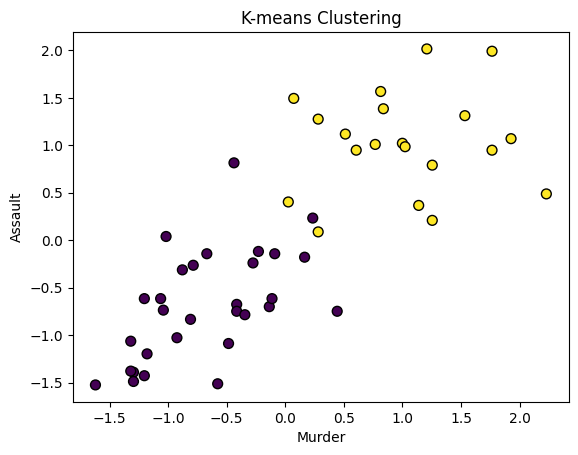

In [32]:
#Visualizing K-means clusters
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=df['KMeans_Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.title('K-means Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

In [33]:
#DBSCAN Clustering
desired_eps = 2.5
desired_min_samples = 3
dbscan = DBSCAN(eps=desired_eps, min_samples=desired_min_samples)
df['DBSCAN_Cluster'] = dbscan.fit_predict(x_scaled)

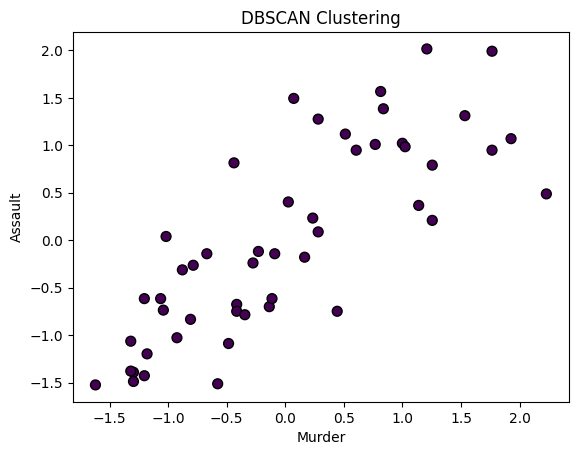

In [34]:
#Visualizing DBSCAN clusters
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

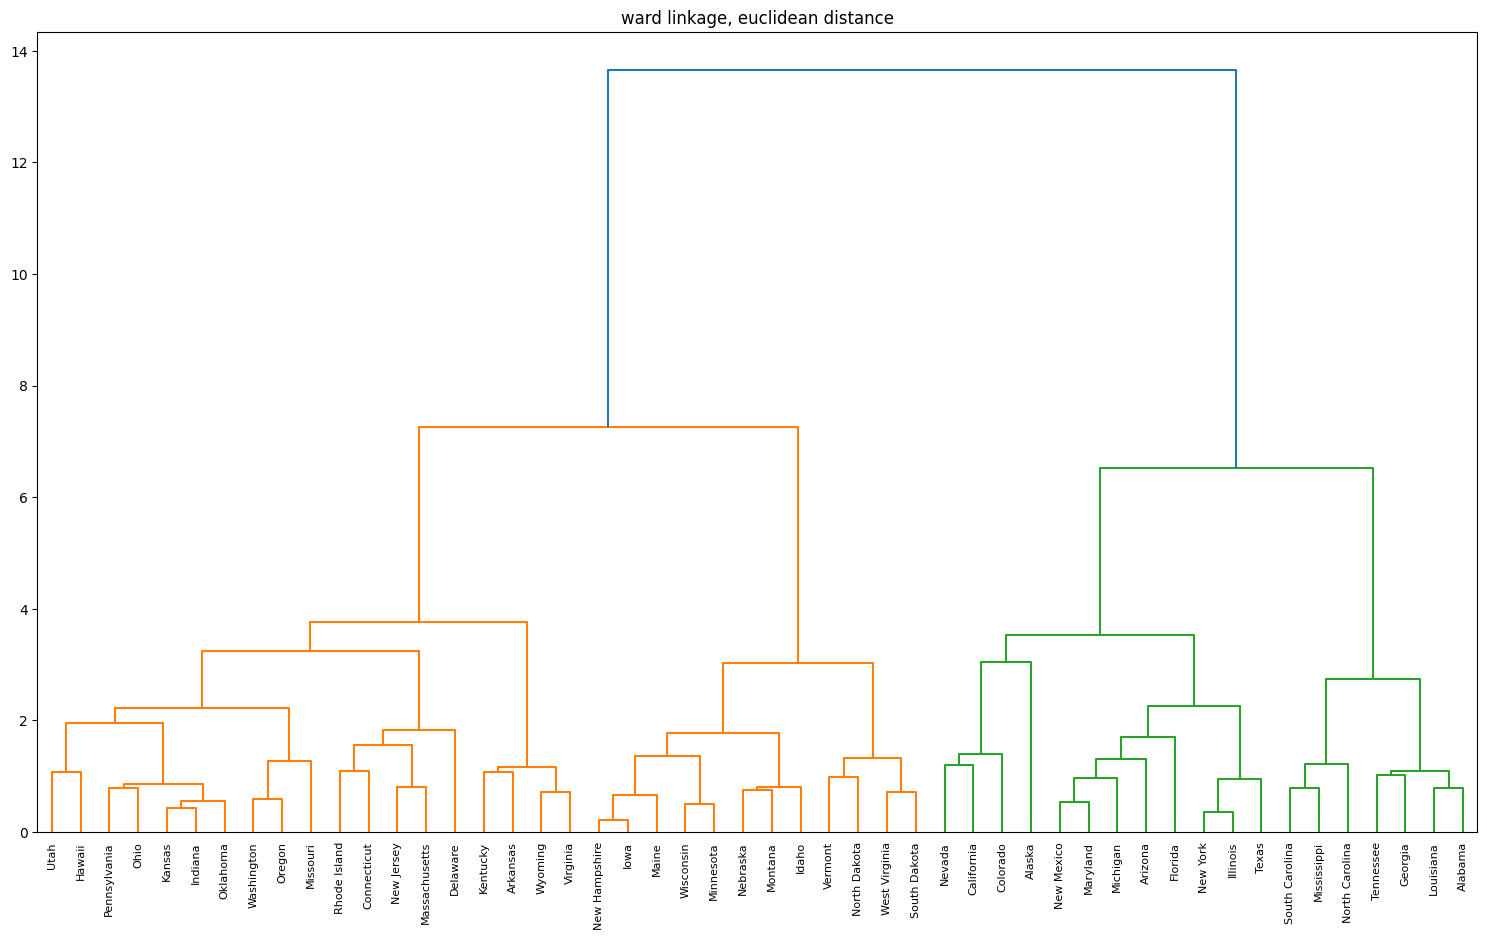

In [37]:
#Hierarchical clustering with 'ward' linkage and 'euclidean' metric
linkage_method = 'ward'
distance_measure = 'euclidean'

plt.figure(figsize=(18, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

linkage_matrix = linkage(x_scaled, method=linkage_method, metric=distance_measure)
dendrogram(linkage_matrix, labels=df['State'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title(f"{linkage_method} linkage, {distance_measure} distance")

plt.show()


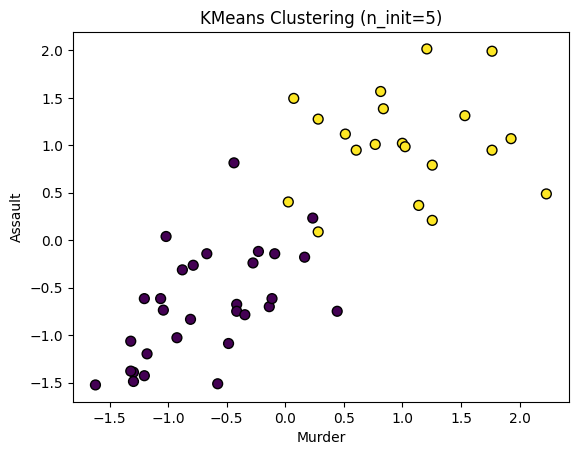

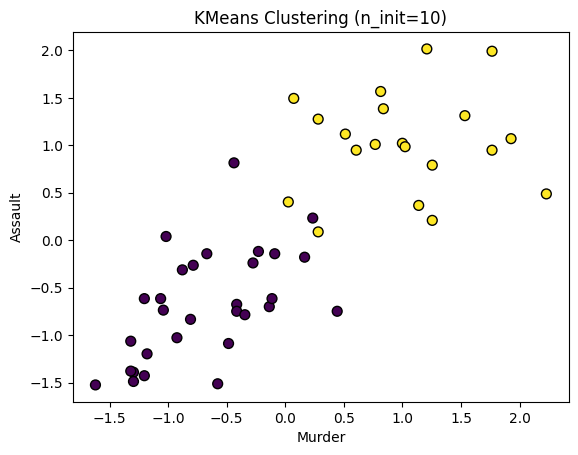

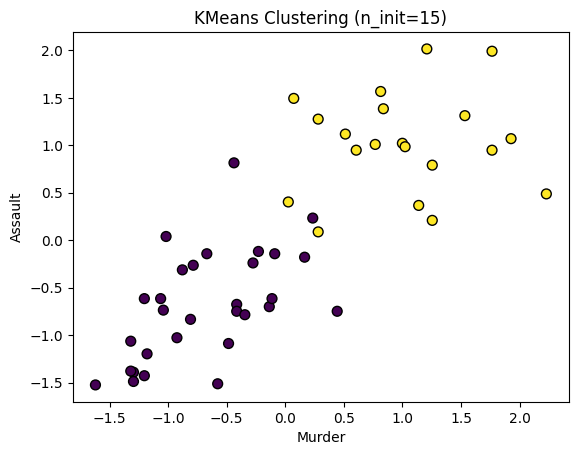

In [38]:
#KMeans clustering with different number of clusters and initialization
desired_n_inits = [5, 10, 15]
for n_init in desired_n_inits:
    kmeans = KMeans(n_clusters=desired_number_of_clusters, n_init=n_init, random_state=42)
    df['KMeans_Cluster'] = kmeans.fit_predict(x_scaled)
    plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=df['KMeans_Cluster'], cmap='viridis', edgecolors='k', s=50)
    plt.title(f'KMeans Clustering (n_init={n_init})')
    plt.xlabel('Murder')
    plt.ylabel('Assault')
    plt.show()

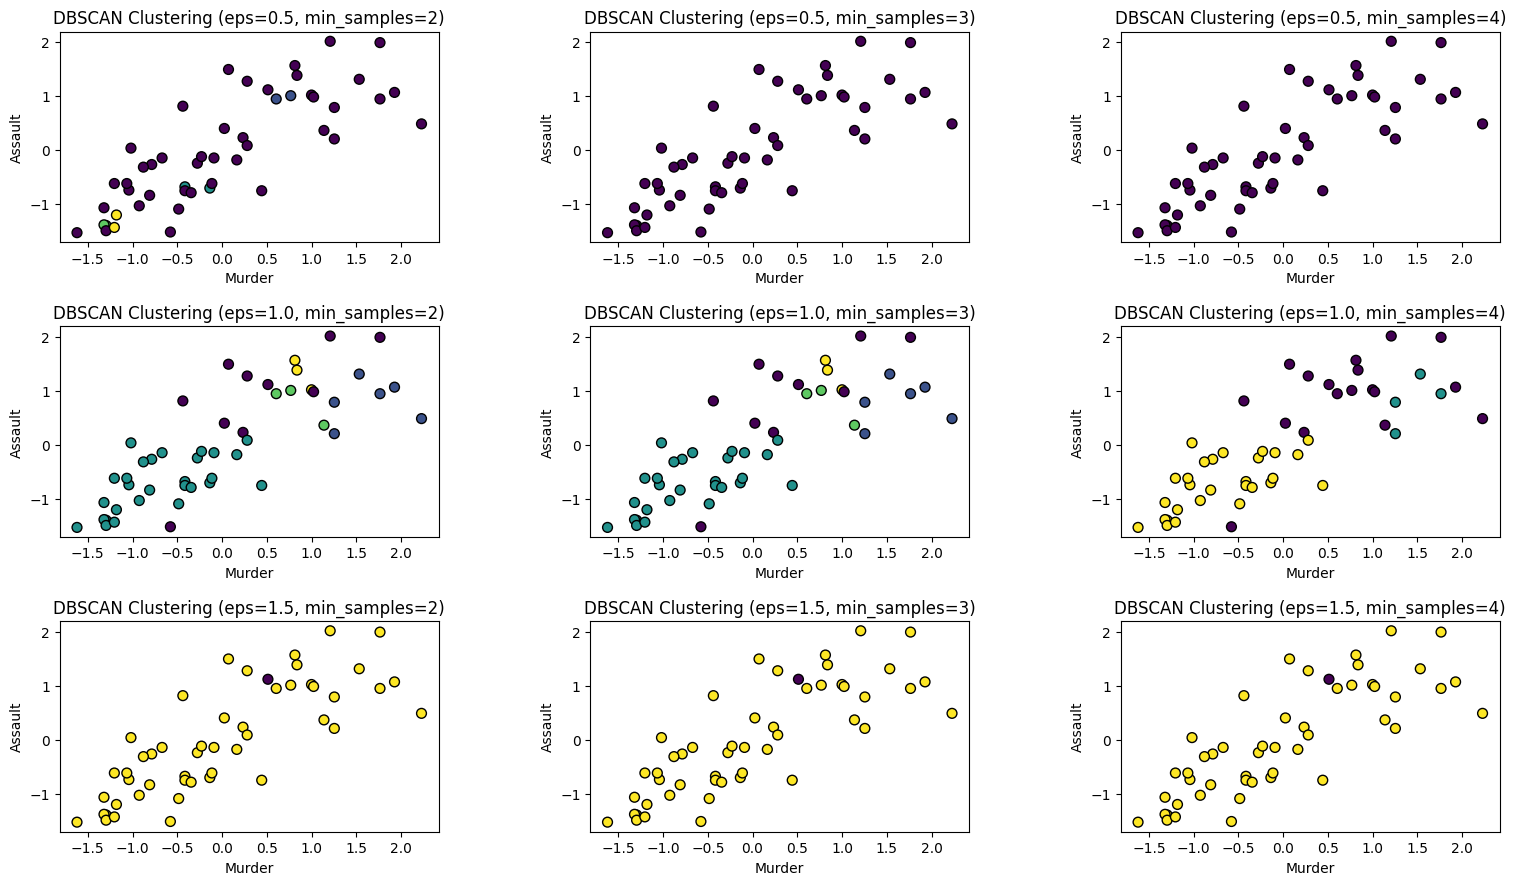

In [39]:
#DBSCAN clustering with different eps and min_samples
desired_epss = [0.5, 1.0, 1.5]
desired_min_samples_values = [2, 3, 4]
plt.figure(figsize=(18, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

for i, eps in enumerate(desired_epss):
    for j, min_samples in enumerate(desired_min_samples_values):
        plt.subplot(3, 3, i*3 + j + 1)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['DBSCAN_Cluster'] = dbscan.fit_predict(x_scaled)
        plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', edgecolors='k', s=50)
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Murder')
        plt.ylabel('Assault')

plt.show()

# Assign_7_2)Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [41]:
df = pd.read_csv("/content/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [42]:
df.shape

(50, 5)

In [43]:
df= df.rename(columns={'Unnamed: 0': 'States'})

In [44]:
df

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [45]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [46]:
df.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [47]:
#Excluding non-numeric columns from standardization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
crime_data_scaled = scaler.fit_transform(df[numeric_columns])


In [48]:
#Performing Hierarchical Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(crime_data_scaled)

In [49]:
#Performing KMeans Clustering
kmeans = KMeans(n_clusters=3, n_init=10)  # Set n_init explicitly
df['KMeans_Cluster'] = kmeans.fit_predict(crime_data_scaled)

In [50]:
#Performing DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(crime_data_scaled)

In [56]:
#Number of clusters formed by each algorithm
print("\nNumber of clusters formed by each algorithm:")
print("Hierarchical Clustering:", df['Hierarchical_Cluster'].nunique())
print("KMeans Clustering:", df['KMeans_Cluster'].nunique())
print("DBSCAN Clustering:", df['DBSCAN_Cluster'].nunique())


Number of clusters formed by each algorithm:
Hierarchical Clustering: 3
KMeans Clustering: 3
DBSCAN Clustering: 1


In [58]:
#Visualizing the clusters
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering')

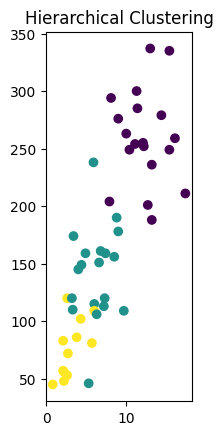

In [60]:
plt.subplot(1, 3, 1)
plt.scatter(df['Murder'], df['Assault'], c=df['Hierarchical_Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering')

Text(0.5, 1.0, 'KMeans Clustering')

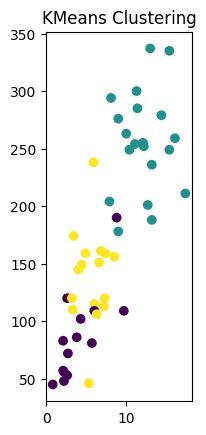

In [62]:
plt.subplot(1, 3, 2)
plt.scatter(df['Murder'], df['Assault'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('KMeans Clustering')

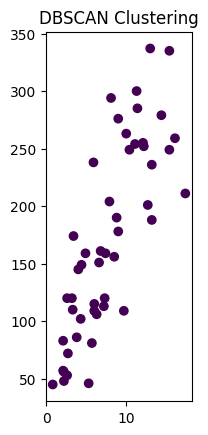

In [63]:
plt.subplot(1, 3, 3)
plt.scatter(df['Murder'], df['Assault'], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

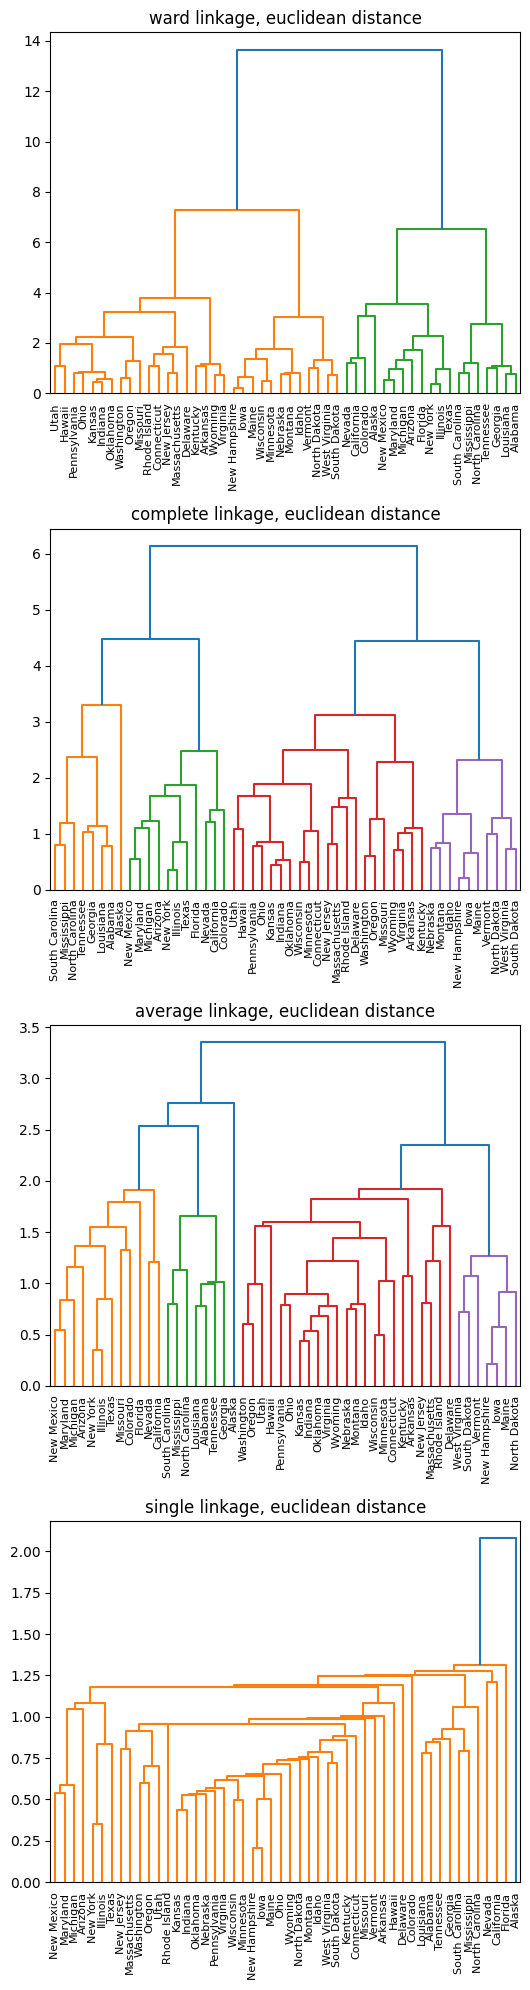

In [67]:
#linkage methods and distance measures
linkage_methods = ['ward', 'complete', 'average', 'single']
distance_measures = ['euclidean']

plt.figure(figsize=(20, 20))

for i, linkage_method in enumerate(linkage_methods):
    for j, distance_measure in enumerate(distance_measures):
        plt.subplot(4, 4, i * 4 + j + 1)
        linkage_matrix = linkage(crime_data_scaled, method=linkage_method, metric=distance_measure)
        dendrogram(linkage_matrix, labels=df['States'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
        plt.title(f"{linkage_method} linkage, {distance_measure} distance")

plt.tight_layout()
plt.show()
